1- Level of education coding. 

- 9 = grade school, 
- 12 = high school graduate, 
- 14 = some college, 
- 16 = college graduate, 
- 17 = some graduate work, 
- 18 = master's degree, 
- 20 = Ph.D., M.D., or other advanced degree.

2 - Occupation according to Hollingshead classification (reverse numbering)

Approach 2:

Change the data into ranges and then one hot encode them.

In [63]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf

In [56]:
df = pd.read_csv('Affairs.csv')
df.drop('Unnamed: 9', axis = 1, inplace=True)

In [57]:
## Since the dataset is unbalanced, we have 451 extramarital_affairs == 0 in a dataset of 600 records.
## So, here I will remove 400 records and keep only 50 records with extramarital_affairs == 0

# Store the records with extramarital_affairs > 0
label_greater_than_0 = df[df['extramarital_affairs'] > 0]

# Store the records with extramarital_affairs == 0
label_equal_to_0 = df[df['extramarital_affairs'] == 0]
print(f"Equal to 0: {label_equal_to_0.shape}, Greater than 0: {label_greater_than_0.shape}")


# Randomly shuffle the records of the dataframe with labels == 0 and store them. (I'm keeping only 50 records with label_equal_to_0 to keef df balanced)
label_equal_to_0 = label_equal_to_0.sample(frac=1)
label_equal_to_0.reset_index(inplace=True)
label_equal_to_0 = label_equal_to_0.loc[:50, :]
print(f"Equal to 0: {label_equal_to_0.shape}")

Equal to 0: (451, 9), Greater than 0: (150, 9)
Equal to 0: (51, 10)


In [58]:
# Create new dataframe of 200 records
df = pd.concat([label_greater_than_0, label_equal_to_0], ignore_index=True, axis=0)
df.drop('index', axis=1, inplace=True)

In [59]:
# Change columns to ranges
pd.get_dummies(df['age'])
df['age'] = pd.cut(df['age'], bins=[17.5, 22.0, 27.0, 32.0, 42.0, 47.0, 57.0], labels=['17-22', '22-27', '27-32', '32-42', '42-47', '47-57'])
df['yearsmarried'] = pd.cut(df['yearsmarried'], bins=[0, 1.5, 5, 10, 15], labels=['0-1.5', '1.5 -5', '5-10', '10-15'])
df['gender'] = df['gender'].map({'male': 0, 'female': 1})
df['children'] = df['children'].map({'no': 0, 'yes': 1})
df['education'] = df['education'].map({
  9 : 'grade school', 
  12: 'high school graduate',
  14: 'some college',
  16: 'college graduate', 
  17: 'some graduate work', 
  18: "master's degree", 
  20: 'Ph.D., M.D., or other advanced degree'
  })

# Normalize columns
df['religiousness_level'] = df['religiousness_level'].apply(lambda x: x/5)
df['self_rating_of_marriage'] = df['self_rating_of_marriage'].apply(lambda x: x/5)
df['occupation'] = df['occupation'].apply(lambda x: x/7)

# One Hot Encode Columns
age_dummies = pd.get_dummies(df['age'], prefix='age', prefix_sep='.', dtype=float)
years_married_dummies = pd.get_dummies(df['yearsmarried'], prefix='yearsmarried', prefix_sep='.', dtype=float)
education_dummies = pd.get_dummies(df['education'], prefix='education', prefix_sep='.', dtype=float)

# Combine Dummies with the df
df = pd.concat([df, age_dummies, years_married_dummies, education_dummies], axis=1)
df.drop(['age', 'yearsmarried', 'education'], axis=1, inplace=True)

In [64]:
df

,extramarital_affairs,gender,children,religiousness_level,occupation,self_rating_of_marriage,age.17-22,age.22-27,age.27-32,age.32-42,age.42-47,age.47-57,yearsmarried.0-1.5,yearsmarried.1.5 -5,yearsmarried.5-10,yearsmarried.10-15,"education.Ph.D., M.D., or other advanced degree",education.college graduate,education.grade school,education.high school graduate,education.master's degree,education.some college,education.some graduate work
0,3,0,0,0.6,0.571429,0.8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,1,1,0.6,0.142857,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7,0,1,1.0,0.857143,0.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,12,1,1,0.6,0.714286,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,0,0.8,0.714286,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,1,1.0,0.857143,0.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,0,1,0,0.4,0.714286,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
198,0,0,1,0.8,0.714286,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0,0,1,1.0,0.857143,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


extramarital_affairs
0     51
7     42
12    38
1     34
3     19
2     17
Name: count, dtype: int64


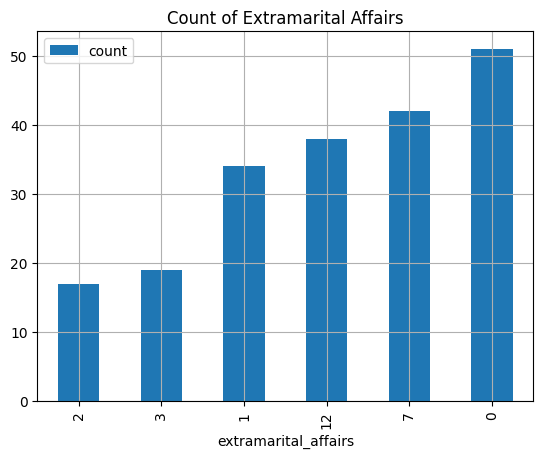

In [65]:
# Visualize extramarital_affairs
affairs = df['extramarital_affairs'].value_counts()
print(affairs)

affairs.sort_values(ascending=True, inplace=True)
affairs.plot(kind='bar', grid=True, legend=True, title='Count of Extramarital Affairs')

plt.show()

In [76]:
# Separate Data
label = df['extramarital_affairs']
features = df.drop('extramarital_affairs', axis=1)

# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features.values, label, test_size=0.2, random_state=42)

In [78]:
# change y labels to float64
y_train = tf.cast(y_train, dtype=tf.float64)
y_test = tf.cast(y_test, dtype=tf.float64)

X_train.shape, X_train.dtype, X_test.shape, X_test.dtype, y_train.shape, y_train.dtype, y_test.shape, y_test.dtype

((160, 22),
 dtype('float64'),
 (41, 22),
 dtype('float64'),
 TensorShape([160]),
 tf.float64,
 TensorShape([41]),
 tf.float64)

In [79]:
from keras import Sequential
from keras.layers import InputLayer, Dense
from keras.metrics import R2Score, MeanSquaredError
from keras.losses import MeanAbsoluteError
from keras.optimizers import Adam

ANN = Sequential([
  InputLayer(shape = (22,)),
  Dense(units = 10, activation = 'relu'),
  Dense(units = 1)
])

ANN.compile(optimizer = Adam(), loss = MeanAbsoluteError(), metrics = [R2Score(), MeanSquaredError()])

training = ANN.fit(X_train, y_train, epochs = 100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3841 - mean_squared_error: 39.4972 - r2_score: -0.9126  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5123 - mean_squared_error: 40.3801 - r2_score: -0.9633 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 4.6115 - mean_squared_error: 41.2335 - r2_score: -0.9677
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2195 - mean_squared_error: 36.1694 - r2_score: -0.8581 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1986 - mean_squared_error: 37.0566 - r2_score: -0.7732 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0494 - mean_squared_error: 33.8817 - r2_score: -0.7827 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5092 - mean_squared_error: 39.2572 - r2_score: -0.9228 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.4135 - mean_squared_error: 38.9597 - r2_score: -0.7870
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5552 - mean_squared

In [80]:
## Testing on sklearn models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR_predictions = LR.predict(X_test)
LR_r2 = r2_score(y_pred=LR_predictions, y_true=y_test)
print(f'Linear Regression => R2 Score: {LR_r2:.2f}')

# Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)
tree_r2 = r2_score(y_pred=tree_predictions, y_true=y_test)
print(f'Decision Tree => R2 Score: {tree_r2:.2f}')

# Random Forest
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest_predictions = forest.predict(X_test)
forest_r2 = r2_score(y_pred=forest_predictions, y_true=y_test)
print(f'Random Forest => R2 Score: {forest_r2:.2f}')

# Support Vector
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
svr_predictions = svr.predict(X_test)
svr_r2 = r2_score(y_pred=svr_predictions, y_true=y_test)
print(f'svr => R2 Score: {svr_r2:.2f}')

Linear Regression => R2 Score: 0.11
Decision Tree => R2 Score: -0.42
Random Forest => R2 Score: 0.07
svr => R2 Score: 0.11
